# Coupled Electronic Oscillators

## Two RLC's Coupled Through Resistor

/home/dkeathley/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/dkeathley/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-0.3, 1.0)

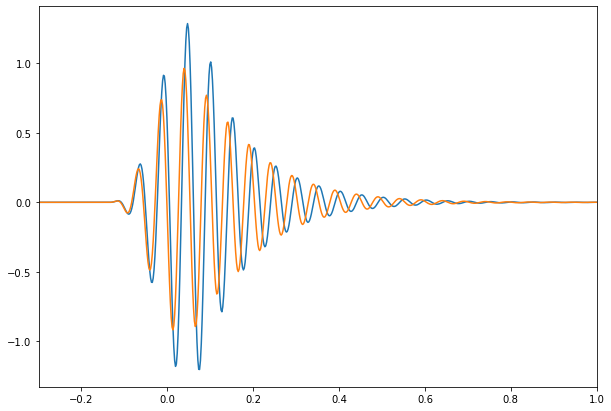

In [713]:
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('../includes')
import pulse_functions as pulses


t = np.linspace(-1, 1, 1000)

fwhm = 0.1
fc = 17
wc = 2*np.pi*fc

V1 = pulses.cos2pulse(t, fwhm, wc, 0)['E']
V2 = 1.0*pulses.cos2pulse(t, fwhm, wc, np.pi/2)['E']


fig = plt.figure()
fig.set_size_inches(10, 7)

# plt.plot(t, V1, t, V2)
# plt.xlim(-0.25, 0.25);

R1 = 0.02
w1 = 2*np.pi*20
C1 = 0.05
L1 = 1/w1**2/C1


R2 = 0.02
w2 = 2*np.pi*20
C2 = 0.05
L2 = 1/w2**2/C2

Rc = 0.075

V1f = np.fft.fft(V1)
V2f = np.fft.fft(V2)

dt = t[1] - t[0]
w = np.fft.fftfreq(t.size, d=dt)*2*np.pi

I1f = 1j*w*C1*V1f/(1 - w**2*L1*C1 + 1j*w*R1*C1) + \
     1j*w*C1*V2f/(1 - w**2*L1*C1 + 1j*w*C1*(R1 + Rc))

I2f = 1j*w*C2*V2f/(1 - w**2*L2*C2 + 1j*w*R2*C2) + \
     1j*w*C2*V1f/(1 - w**2*L2*C2 + 1j*w*C2*(R2 + Rc))


I1 = np.fft.ifft(I1f)
I2 = np.fft.ifft(I2f)

plt.plot(t, I1/20)
plt.plot(t, 1*I2/20)
plt.xlim(-0.3, 1.0)
# plt.plot(t, V2)

## Two RLC's Coupled Via RLC

(-0.3, 1.0)

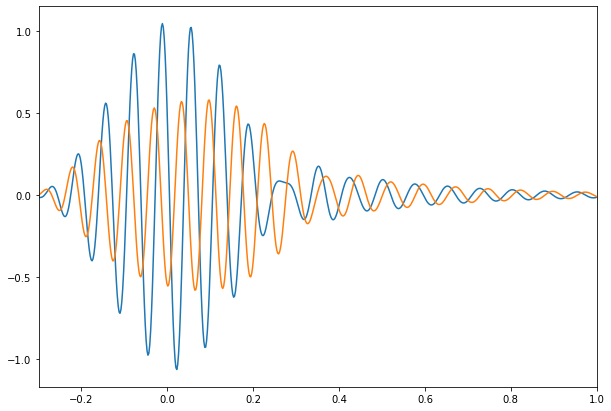

In [330]:
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('../includes')
import pulse_functions as pulses


t = np.linspace(-10.5, 10.5, 10000)

fwhm = 0.25
fc = 15
wc = 2*np.pi*fc

V1 = 1.0*pulses.cos2pulse(t, fwhm, wc, 0)['E']
V2 = 1.0*pulses.cos2pulse(t, fwhm, wc, -1*np.pi/2)['E']


fig = plt.figure()
fig.set_size_inches(10, 7)

# plt.plot(t, V1, t, V2)
# plt.xlim(-0.25, 0.25);

R1 = 0.02
w1 = 2*np.pi*20
C1 = 0.075
L1 = 1/w1**2/C1


R2 = 0.02
w2 = 2*np.pi*20
C2 = 0.075
L2 = 1/w2**2/C2

Rc = 0.001
#Rc = 1000
Cc = 0.25
Lc = 0.0019050

V1f = np.fft.fft(V1)
V2f = np.fft.fft(V2)

dt = t[1] - t[0]
w = np.fft.fftfreq(t.size, d=dt)*2*np.pi

w[np.where(w == 0)[0]] = 1e-18

Z1 = R1 + 1j*w*L1 + 1/(1j*w*C1)
Z2 = R2 + 1j*w*L2 + 1/(1j*w*C2)

Zp1 = (Z2 + Rc + 1j*w*Lc)/(1 + (Z2 + Rc + 1j*w*Lc)*1j*w*Cc) + Rc + 1j*w*Lc

Zp2 = (Z1 + Rc + 1j*w*Lc)/(1 + (Z1 + Rc + 1j*w*Lc)*1j*w*Cc) + Rc + 1j*w*Lc

I21f = (V1f - V1f*(1j*w*Lc + Rc)/Zp1)/(1j*w*Lc + Rc + Z2) 
I12f = (V2f - V2f*(1j*w*Lc + Rc)/Zp2)/(1j*w*Lc + Rc + Z1)

I1f = V1f/Z1 + I12f
I2f = V2f/Z2 + I21f

I1 = np.real(np.fft.ifft(I1f))
I2 =np.real(np.fft.ifft(I2f))

plt.plot(t, I1/20)
plt.plot(t, -1*I2/20)
plt.xlim(-0.3, 1.0)
# plt.plot(t, V2)

(-0.35, 0.6)

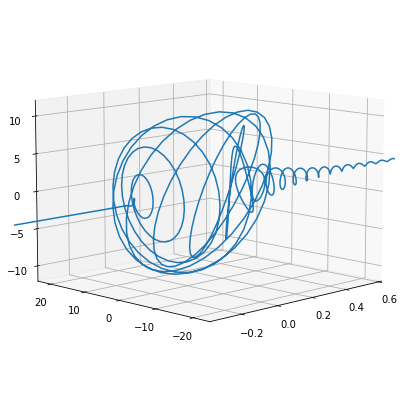

In [331]:
fig = plt.figure()
fig.set_size_inches(10, 7)

ax = plt.axes(projection='3d')
ax.view_init(10, 225)
ax.plot3D(t, I1, -1*I2)
ax.set_xlim(-0.35, 0.6)

0.06384447614514038
(8.631259334585216+64.56792830490946j)


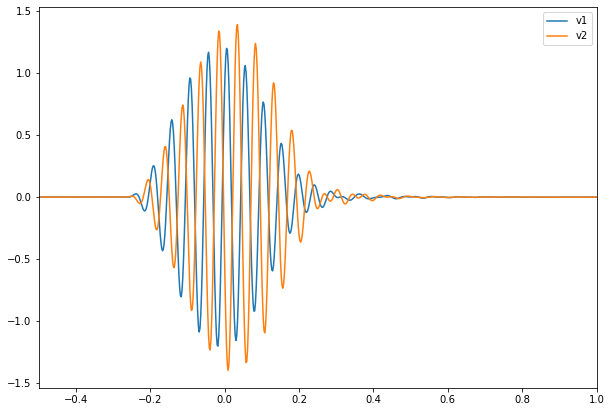

In [342]:
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('../includes')
import pulse_functions as pulses


t = np.linspace(-10.5, 10.5, 10000)

fwhm = 0.2
fc = 20
wc = 2*np.pi*fc

V1 = 1.0*pulses.cos2pulse(t, fwhm, wc, 0)['E']
V2 = 1.0*pulses.cos2pulse(t, fwhm, wc, np.pi/2)['E']


fig = plt.figure()
fig.set_size_inches(10, 7)

# plt.plot(t, V1, t, V2)
# plt.xlim(-0.25, 0.25);

R1 = 2.0
w1 = 2*np.pi*23
C1 = 0.00075
L1 = 1/w1**2/C1


R2 = 2.0
w2 = 2*np.pi*23
C2 = 0.00075
L2 = 1/w2**2/C2

print(L2)

Rc = 0.0
# Rc = 1000
Cc = 0.00075
Lc = 0.20


V1f = np.fft.fft(V1)
V2f = np.fft.fft(V2)

dt = t[1] - t[0]
w = np.fft.fftfreq(t.size, d=dt)*2*np.pi

w[np.where(w == 0)[0]] = 1e-18

Z1 = R1 + 1j*w*L1
Z2 = R2 + 1j*w*L2
Zc = Rc + 1j*w*Lc


# a = np.array([[Z1 + 1/(1j*w*C1), -1/(1j*w*C1), np.zeros(w.shape), np.zeros(w.shape)], 
#               [1/(1j*w*C1), -1*Zc - 1/(1j*w*C1) - 1/(1j*w*Cc), 1/(1j*w*Cc), np.zeros(w.shape)],
#               [np.zeros(w.shape), 1/(1j*w*Cc), -1*Zc - 1/(1j*w*Cc) - 1/(1j*w*C2), 1/(1j*w*C2)],
#               [np.zeros(w.shape), np.zeros(w.shape), 1/(1j*w*C2), -1/(1j*w*C2) - Z2]]).transpose()

a = np.array([[Z1 + 1/(1j*w*C1), 1/(1j*w*C1), np.zeros(w.shape), np.zeros(w.shape)],
              [-1/(1j*w*C1),  -1*Zc - 1/(1j*w*C1) - 1/(1j*w*Cc), 1/(1j*w*Cc), np.zeros(w.shape)],
              [np.zeros(w.shape),  1/(1j*w*Cc), -1*Zc - 1/(1j*w*Cc) - 1/(1j*w*C2), 1/(1j*w*C2)],
              [np.zeros(w.shape),  np.zeros(w.shape), 1/(1j*w*C2), -1/(1j*w*C2) - Z2]]).transpose()

b = np.array([V1f, np.zeros(w.shape), np.zeros(w.shape), V2f]).transpose()


If = np.linalg.solve(a, b)

print(b[:, 3].max())

I1f = If[:, 0]
I2f = If[:, 1]
I3f = If[:, 2]
I4f = If[:, 3]

V1of = (I1f - I2f)/(1j*w*C1)
V2of = (I3f - I4f)/(1j*w*C2)

V1o = np.real(np.fft.ifft(V1of))
V2o = np.real(np.fft.ifft(V2of))


plt.plot(t, V1o, label='v1')
plt.plot(t, V2o, label='v2')
plt.xlim(-0.5, 1.0)
plt.legend()
# #plt.plot(t, V2)

(-0.35, 0.6)

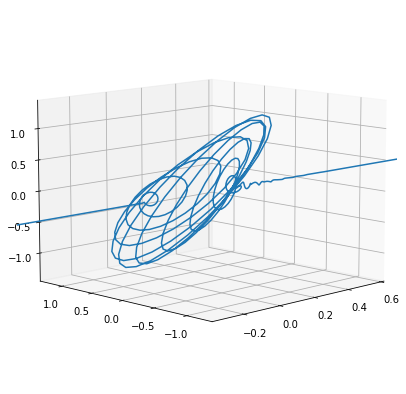

In [343]:
fig = plt.figure()
fig.set_size_inches(10, 7)

ax = plt.axes(projection='3d')
ax.view_init(10, 225)
ax.plot3D(t, V1o, V2o)
ax.set_xlim(-0.35, 0.6)

## Transmission Line Simulation

In reality, the antennas are connected by wires that behave more like transmission lines.  This is important as if the wires get longer, they can cary waves over a macroscopic distance.  This induces a propagation delay that coudl be observed.  Also, it leads to a different profile in the resonant waveform that gets induced across both sets of antennas.

Here we model a pair of antennas connected via a transmission line.  The antennas follow the coupled oscillator approach similar to above.  However, now, instead of a lumped element coupler, we use a finite-length transmission-line coupler between the antenna pair.

### First: A Note on Units

For convenience in all of the code below we use a modified unit system defined using the natural length scales of the problem: nanometers and femtoseconds.  Where relevant we denote the nm-fs units are denoted as SI units with an n subscript.  

This nm-fs unit system leads to the conversions shown in table {numref}`nm-fs-conversion-table`

```{table} Conversion from SI to nm-fs units for the calculations that follow.
:name: nm-fs-conversion-table

| Property | SI Unit | nm-fs units | 
| --- | --- | --- |
| Capacitance | F | $10^{12}$ F<sub>n</sub> |
| Inductance | H | $10^{18}$ H<sub>n</sub>  |
| Resistance | $\Omega$ | $10^{3}$ $\Omega$<sub>n</sub> |
| $\epsilon_0$ | F/m | $10^{3}$ F<sub>n</sub>/nm |
| $\mu_0$     | H/m | $10^{9}$ H<sub>n</sub>/nm |

```

### Pulse Setup

We start by defining a waveform to drive each antenna.  Tese are defined as $V_1(t)$ and $V_2(t)$ for antenna 1 and antenna 2.  

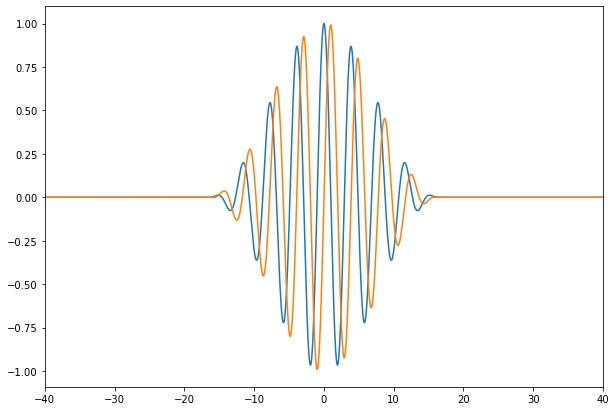

In [9]:
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('../includes')
import pulse_functions as pulses

# -- Constants -- 
c = 300 #Speed of light in nm/fs
eps0 = 8.85418782e-12*1e3 #permittivity of freespace in nm, fs units
mu0 = 1.25663706e-6*1e9 #permeability of freespace in nm, fs units

# -- Settings -- 

#Time axis in femtoseconds
t = np.linspace(-1000, 1000, 100000)

#FWHM in fs
fwhm = 12 

#Central wavelength in nm
yc = 1170 

#Phase delay
phaseDelay = -1*np.pi/2

# ------------------------------

# -- Calculations -- 
fc = c/yc
wc = 2*np.pi*fc

#Incident pulses for each side:
V1 = 1.0*pulses.cos2pulse(t, fwhm, wc, 0)['E']
V2 = 1.0*pulses.cos2pulse(t, fwhm, wc, phaseDelay)['E']


# -- Plots -- 
fig = plt.figure()
fig.set_size_inches(10, 7)

plt.plot(t, V1, t, V2)
plt.xlim(-40, 40);



### Excited Wave At Single Antennas

This is the excited wave at each single antenna in free-space assuming there is no couplinb between them. 

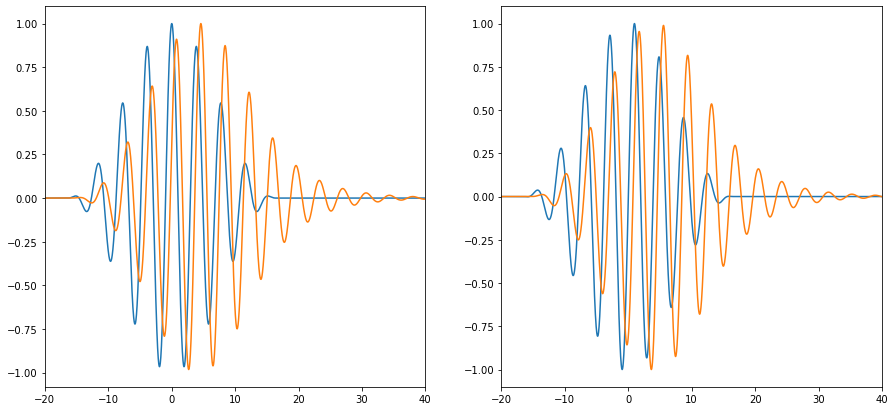

In [10]:
tau1 = 3
yres1 = 1100
C1 = 15e-18*1e12

tau2 = 3
yres2 = 1100
C2 = 15e-18*1e12

# -- Calculations -- 
dt = t[1] - t[0]
w = np.fft.fftfreq(t.size, d=dt)*2*np.pi

w[np.where(w == 0)[0]] = 1e-18

wres1 = 2*np.pi*c/yres1
L1 = 1/(wres1**2*C1)
R1 = 1/(wres1**2*tau1*C1)
V1f = np.fft.fft(V1)
Vin1f = V1f/(1 - w**2*C1*L1 + 1j*w*C1*R1)
Vin1 = np.real(np.fft.ifft(Vin1f))

wres2 = 2*np.pi*c/yres2
L2 = 1/(wres1**2*C2)
R2 = 1/(wres1**2*tau1*C2)
V2f = np.fft.fft(V2)
Vin2f = V2f/(1 - w**2*C2*L2 + 1j*w*C2*R2)
Vin2 = np.real(np.fft.ifft(Vin2f))

# -- Plots -- 
fig = plt.figure()
fig.set_size_inches(15, 7)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(t, V1/np.abs(V1).max(), t, Vin1/np.abs(Vin1).max())
ax1.set_xlim(-20, 40)

ax2.plot(t, V2/np.abs(V2).max(), t, Vin2/np.abs(Vin2).max())
ax2.set_xlim(-20, 40);


### Connecting With a Transmission Line: Initial Guess as Twin-Lead T-Line

Now we are going to connect the two antennas with a transmission line.  

We will start with the approximation of the wire as a twin-lead T-line. 

For this we need to calculate the reflectivity $\Gamma$, the effective impedance $Z_0$, and the propagation constant $\beta$ from the twin-lead equations.  These were taken from [here](https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Electro-Optics/Book%3A_Electromagnetics_II_(Ellingson)/07%3A_Transmission_Lines_Redux/7.01%3A_Parallel_Wire_Transmission_Line) for reference.  

#### Twin-Lead T-Line Properties

In [24]:
# -- Settings -- 
D = 250 #wire spacing
d = 15 #wire width
l = 600 #wire length
epsr = 1.7
alpha = 1/1200

# -- Calculations -- 
Lp = (mu0/np.pi)*np.log((D/d) + np.sqrt((D/d)**2 - 1))
Cp = np.pi*eps0*epsr/np.log((D/d) + np.sqrt((D/d)**2 - 1))

#Line impedance and velocity
Z0 = np.sqrt(Lp/Cp) #impedance
v = 1/np.sqrt(Lp*Cp) #velocity
beta = w/v #propagation constant

#### Calculate Waveforms with Line in Place

(-50.0, 100.0)

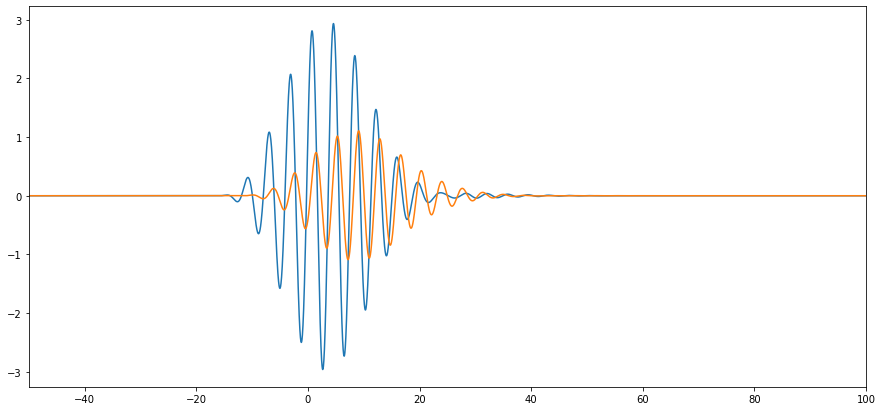

In [25]:
#Load impedance at 2 as seen by source at 1
ZL1 = (R2 + 1j*w*L2)/(1 + 1j*w*R2*C2 - w**2*C2*L2)

Gamma1 = (ZL1 - Z0)/(ZL1 + Z0)

Zin1 = Z0*(1 + Gamma1*np.exp(-1j*2*beta*l)*np.exp(-2*alpha*l))/(1 - Gamma1*np.exp(-1j*2*beta*l)*np.exp(-2*alpha*l))

Zp1 = Zin1/(1 + 1j*w*C1*Zin1)

Vin1f = V1f*Zp1/(R1 + 1j*w*L1 + Zp1)

Vp1f = Vin1f/(np.exp(1j*beta*l)*np.exp(alpha*l) + Gamma1*np.exp(-1j*beta*l)*np.exp(-1*alpha*l))
Vo21f = Vp1f*(1 + Gamma1)

Vin1 = np.real(np.fft.ifft(Vin1f))
Vo21 = np.real(np.fft.ifft(Vo21f))

# -- Plots -- 
fig = plt.figure()
fig.set_size_inches(15, 7)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(1, 2, 2)

# ax1.plot(t, V1/np.abs(V1).max())
ax1.plot(t, Vin1)
ax1.plot(t, -1*Vo21)
ax1.set_xlim(-50, 100)


# ax2.plot(t, V2/np.abs(V2).max(), t, Vin2/np.abs(Vin2).max())
# ax2.set_xlim(-20, 40);


(-50.0, 100.0)

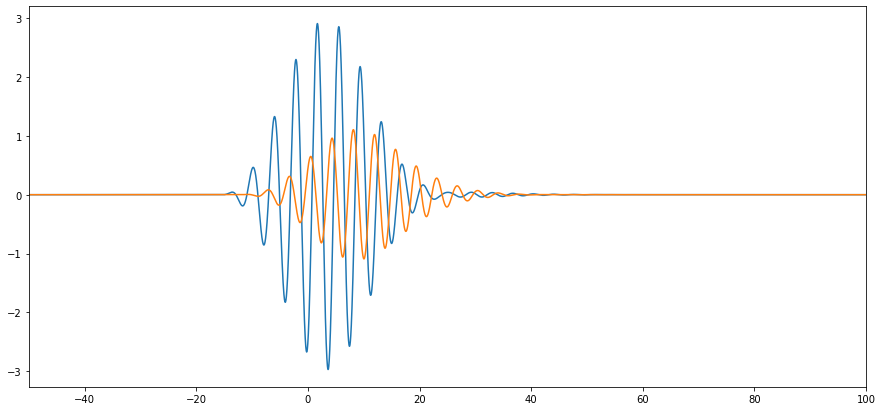

In [26]:
#Load impedance at 2 as seen by source at 1
ZL2 = (R1 + 1j*w*L1)/(1 + 1j*w*R1*C1 - w**2*C1*L1)

Gamma2 = (ZL2 - Z0)/(ZL2 + Z0)

Zin2 = Z0*(1 + Gamma2*np.exp(-1j*2*beta*l)*np.exp(-2*alpha*l))/(1 - Gamma2*np.exp(-1j*2*beta*l)*np.exp(-2*alpha*l))

Zp2 = Zin2/(1 + 1j*w*C2*Zin2)

Vin2f = V2f*Zp2/(R2 + 1j*w*L2 + Zp2)

Vp2f = Vin2f/(np.exp(1j*beta*l)*np.exp(alpha*l) + Gamma2*np.exp(-1j*beta*l)*np.exp(-1*alpha*l))
Vo12f = Vp2f*(1 + Gamma2)

Vin2 = np.real(np.fft.ifft(Vin2f))
Vo12 = np.real(np.fft.ifft(Vo12f))

# -- Plots -- 
fig = plt.figure()
fig.set_size_inches(15, 7)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(1, 2, 2)

# ax1.plot(t, V1/np.abs(V1).max())
ax1.plot(t, Vin2)
ax1.plot(t, Vo12)
ax1.set_xlim(-50, 100)


# ax2.plot(t, V2/np.abs(V2).max(), t, Vin2/np.abs(Vin2).max())
# ax2.set_xlim(-20, 40);


(-50.0, 100.0)

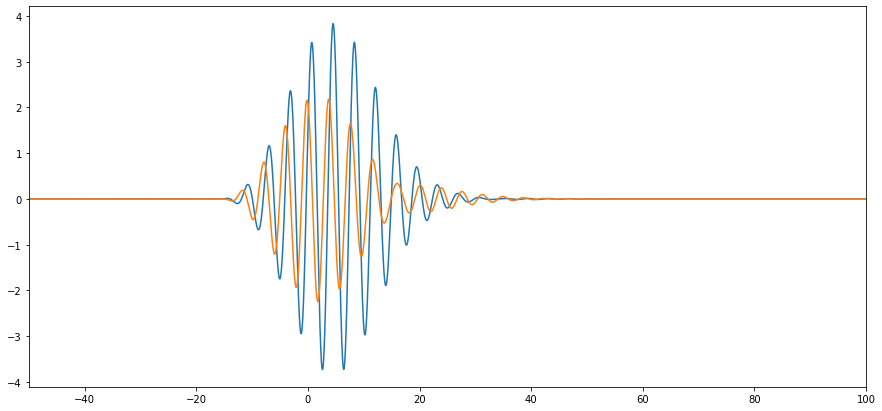

In [30]:
Vg1T = Vin1 + Vo12
Vg2T = Vin2 + Vo21

# -- Plots -- 
fig = plt.figure()
fig.set_size_inches(15, 7)

ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(t, Vg1T)
ax1.plot(t, -1*Vg2T)
ax1.set_xlim(-50, 100)

(-50.0, 100.0)

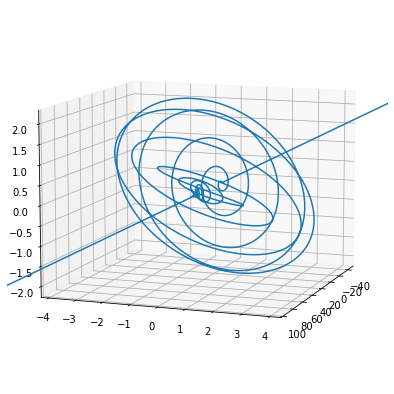

In [28]:
fig = plt.figure()
fig.set_size_inches(10, 7)

ax = plt.axes(projection='3d')
ax.view_init(10, 20)
ax.plot3D(t, Vg1T, Vg2T)
ax.set_xlim(-50, 100)

## Notes

### 2022-12-04

**Notes**
 - So far everything looks perfect -- I really like this model.  It fits every observable thing that we are seeing.  
 - I think that the only remaining thing to include is loss on the transmission line. 
 - That could be loss that is due to the bend and radiation, as well as loss that is on the line
 - For this I should make it purely phenomenological
 - One difference I should keep in mind between this model and experiment (why it will never be 1-1 correspondence) is that in the experiment there is an extended network of these connections!
 
**TODO**
  - [ ] Better label plots
  - [ ] Add in more descriptive text with images and step by step of what is going on in each part
  - [ ] If it makes sense, add in widgets for adjusting different essential parameters (esp. about the pulse and t-line).
    - At least describe the variables.
  - [ ] Clean up introductory parts with simplified models
